<a href="https://colab.research.google.com/github/waltermayor/rescityUAO/blob/master/PreprocesamientoDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#pip install pandas
! pip install sodapy

In [73]:
import pandas as pd
import copy
import seaborn as sns
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt

### Base de datos inundaciones

In [28]:
client = Socrata("www.datos.gov.co", None)
results = client.get("es7m-wj39", limit=10500)
dataAll = pd.DataFrame.from_records(results)


In [11]:
dataAll.dtypes

fecha              object
departamento       object
municipio          object
evento             object
personas           object
familias           object
viviendasaver      object
viviendasdestru    object
dtype: object

In [29]:
dataAll['fecha'] = dataAll['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
dataAll.dtypes

fecha              datetime64[ns, UTC]
departamento                    object
municipio                       object
evento                          object
personas                        object
familias                        object
viviendasaver                   object
viviendasdestru                 object
dtype: object

In [30]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   fecha            10241 non-null  datetime64[ns, UTC]
 1   departamento     10241 non-null  object             
 2   municipio        10241 non-null  object             
 3   evento           10241 non-null  object             
 4   personas         7657 non-null   object             
 5   familias         7651 non-null   object             
 6   viviendasaver    4697 non-null   object             
 7   viviendasdestru  1350 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 640.2+ KB


**Observar datos faltantes** 

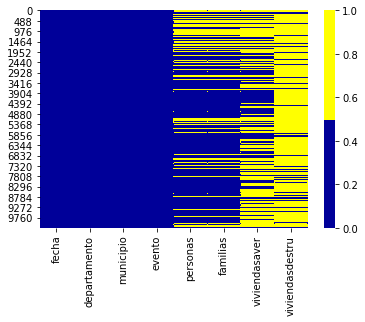

In [31]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [32]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha - 0.0%
departamento - 0.0%
municipio - 0.0%
evento - 0.0%
personas - 25.0%
familias - 25.0%
viviendasaver - 54.0%
viviendasdestru - 87.0%


**Filtrar datos solo para cali**

In [34]:
#filtrar datos solo para cali
dataCali=dataAll[dataAll['municipio']=="CALI"]
print(len(dataCali))
dataCali.head(44)

44


,fecha,departamento,municipio,evento,personas,familias,viviendasaver,viviendasdestru
64,2013-09-16 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,75,15,15,NaN
275,2013-05-27 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,NaN,NaN
313,2013-05-20 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,NaN,NaN
383,2013-04-29 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,NaN,NaN
505,2013-02-24 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,20,4,4,NaN
657,2012-10-23 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,NaN,NaN
1197,2012-05-06 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,100,20,20,NaN
1239,2012-04-28 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,40,8,40,NaN
1316,2012-04-22 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,NaN,NaN
1398,2012-04-18 00:00:00+00:00,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,NaN,NaN


In [35]:
for col in dataCali.columns:
    pct_missing = np.mean(dataCali[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha - 0.0%
departamento - 0.0%
municipio - 0.0%
evento - 0.0%
personas - 32.0%
familias - 32.0%
viviendasaver - 43.0%
viviendasdestru - 86.0%


### Base de datos precipitaciones y temperatura media 1981-2010


In [36]:
client = Socrata("www.datos.gov.co", None)
results = client.get("nsxu-h2dh", limit=1000)
dataAll = pd.DataFrame.from_records(results)

In [ ]:
dataAll.head(100)

,codigo,nombre,categoria,departamento,municipio,corriente,lag,lam,las,lac,log,lom,los,loc,altitud,enepreci30a,febpreci30a,marpreci30a,abrpreci30a,maypreci30a,junpreci30a,julpreci30a,agopreci30a,seppreci30a,octpreci30a,novpreci30a,dicpreci30a,totalpreci30a,enetemp30a,febtemp30a,martemp30a,abrtemp30a,maytemp30a,juntemp30a,jultemp30a,agotemp30a,septemp30a,octtemp30a,novtemp30a,dictemp30a,protemp30a
0,22075030,Riomanso,CO,Tolima,Rovira,Manso,4,12,5.8,N,75,17,4.1,W,2020,97.2,125.1,165.7,215.1,213.2,146.9,115.6,107.1,151.9,185.7,179.6,125.1,1822.2,16.7,16.9,17.0,17.2,17.2,17.0,16.8,17.1,17.2,17.0,16.8,16.8,17.0
1,27015150,Progreso El Hda,CO,Antioquia,Barbosa,Medellin,6,24,50.0,N,75,23,48.0,W,1500,57.5,80.1,113.2,188.6,246.8,199.1,207.6,202.3,234.2,235.4,155.0,83.3,2003.0,21.9,22.2,22.3,22.1,22.1,22.2,22.1,22.2,22.0,21.7,21.7,21.7,22.0
2,21206260,C.Univ.Agrop-Udca,CO,Bogota DC,Bogota DC,BOGOTA,4,47,55.1,N,74,2,59.0,W,2570,33.3,51.3,73.3,83.7,96.9,58.0,54.1,48.3,53.1,101.0,95.3,53.9,768.9,13.8,13.9,14.0,14.0,14.1,14.0,13.8,13.8,13.7,13.8,13.8,13.9,13.9
3,35095030,Tunel El,CO,Boyaca,Cuitiva,Lag de Tota,5,34,19.6,N,72,56,38.2,W,3000,17.1,30.4,57.2,95.7,87.8,70.1,77.9,58.8,62.5,87.2,81.4,23.9,749.9,11.6,11.7,11.8,11.8,11.8,11.4,10.9,10.9,11.2,11.4,11.6,11.8,11.5
4,28035010,Villa Rosa,CO,Cesar,Valledupar,Diluvio,10,11,34.0,N,73,32,50.0,W,70,18.0,10.2,69.3,137.3,167.0,137.3,105.5,154.9,183.8,193.1,132.4,38.2,1344.1,29.4,30.2,30.3,29.6,29.0,28.8,29.2,29.0,28.0,27.7,27.8,28.3,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26095230,Vinculo El,AM,Valle del Cauca,Guadalajara de Buga,Sonsito,3,50,6.7,N,76,17,58.3,W,979,65.6,73.3,124.0,155.6,123.5,68.1,50.7,60.2,101.7,164.9,133.8,85.0,1206.3,23.7,24.0,24.0,23.6,23.5,23.4,23.7,24.0,23.8,23.2,23.1,23.3,23.6
96,44045020,Valparaiso,CO,Caqueta,Valparaiso,Pescado,1,11,42.9,N,75,42,16.1,W,270,125.0,212.4,282.0,388.2,360.7,351.0,332.8,237.2,218.1,230.7,214.3,129.9,3028.4,26.9,26.6,26.3,25.8,25.7,25.3,25.2,25.6,26.1,26.4,26.5,26.6,26.1
97,23085110,Penol El,CO,Antioquia,Penol,Rionegro,6,12,51.3,N,75,14,28.8,W,1956,113.2,112.0,181.0,270.2,296.6,201.4,207.7,236.8,295.5,317.6,220.4,153.2,2605.6,17.8,18.0,18.1,18.3,18.6,18.8,18.7,18.7,18.3,18.0,17.8,17.7,18.2
98,24025030,Sierra La,CP,Boyaca,Duitama,La Rucia,5,58,1.3,N,73,9,43.6,W,2700,119.7,138.5,208.9,249.9,210.8,91.5,75.3,88.6,137.1,251.6,216.0,128.3,1907.5,11.9,12.0,12.1,12.3,12.4,12.3,12.2,12.3,12.1,11.9,11.9,11.9,12.1


In [37]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codigo         450 non-null    object
 1   nombre         450 non-null    object
 2   categoria      450 non-null    object
 3   departamento   450 non-null    object
 4   municipio      450 non-null    object
 5   corriente      450 non-null    object
 6   lag            450 non-null    object
 7   lam            450 non-null    object
 8   las            450 non-null    object
 9   lac            450 non-null    object
 10  log            450 non-null    object
 11  lom            450 non-null    object
 12  los            450 non-null    object
 13  loc            450 non-null    object
 14  altitud        450 non-null    object
 15  enepreci30a    450 non-null    object
 16  febpreci30a    450 non-null    object
 17  marpreci30a    450 non-null    object
 18  abrpreci30a    450 non-null   

**Observar datos faltantes** 

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigo - 0.0%
nombre - 0.0%
categoria - 0.0%
departamento - 0.0%
municipio - 0.0%
corriente - 0.0%
lag - 0.0%
lam - 0.0%
las - 0.0%
lac - 0.0%
log - 0.0%
lom - 0.0%
los - 0.0%
loc - 0.0%
altitud - 0.0%
enepreci30a - 0.0%
febpreci30a - 0.0%
marpreci30a - 0.0%
abrpreci30a - 0.0%
maypreci30a - 0.0%
junpreci30a - 0.0%
julpreci30a - 0.0%
agopreci30a - 0.0%
seppreci30a - 0.0%
octpreci30a - 0.0%
novpreci30a - 0.0%
dicpreci30a - 0.0%
totalpreci30a - 0.0%
enetemp30a - 0.0%
febtemp30a - 0.0%
martemp30a - 0.0%
abrtemp30a - 0.0%
maytemp30a - 0.0%
juntemp30a - 0.0%
jultemp30a - 0.0%
agotemp30a - 0.0%
septemp30a - 0.0%
octtemp30a - 0.0%
novtemp30a - 0.0%
dictemp30a - 0.0%
protemp30a - 0.0%


**Filtrar datos solo para cali**

In [39]:
print(len(dataAll))
#filtrar datos solo para cali
dataInundValle=dataAll[dataAll['departamento']=="Valle del Cauca"]
print(len(dataInundValle))
dataInundValle.head(22)
#print(dataInundCali['municipio'])

450
22


,codigo,nombre,categoria,departamento,municipio,corriente,lag,lam,las,lac,log,lom,los,loc,altitud,enepreci30a,febpreci30a,marpreci30a,abrpreci30a,maypreci30a,junpreci30a,julpreci30a,agopreci30a,seppreci30a,octpreci30a,novpreci30a,dicpreci30a,totalpreci30a,enetemp30a,febtemp30a,martemp30a,abrtemp30a,maytemp30a,juntemp30a,jultemp30a,agotemp30a,septemp30a,octtemp30a,novtemp30a,dictemp30a,protemp30a
35,54035020,Argelia El Recreo,CO,Valle del Cauca,Argelia,Las Vueltas,4,44,0.0,N,76,7,0.0,W,1600,79.8,80.3,112.9,170.1,167.7,106.5,94.9,86.4,126.5,184.0,148.2,91.8,1438.7,20.6,20.7,20.6,20.5,20.5,20.6,20.4,20.6,20.5,20.1,20.3,20.4,20.4
41,53115030,Julio Fernandez,CO,Valle del Cauca,Restrepo,Grande,3,49,0.0,N,76,31,0.0,W,1360,49.4,67.6,76.4,130.3,128.1,84.7,59.5,65.6,106.5,145.2,108.5,66.0,1087.8,20.0,20.2,20.3,20.3,20.2,20.2,19.9,20.1,19.9,19.6,19.7,19.8,20.0
46,54075040,Mision La,CO,Valle del Cauca,Buenaventura,San Juan,4,13,21.1,N,77,16,34.7,W,5,418.1,272.5,337.3,458.0,642.6,612.6,690.0,760.8,819.6,790.0,728.5,675.8,7205.9,25.6,26.0,26.1,26.1,26.1,25.8,25.8,25.7,25.5,25.3,25.2,25.3,25.7
84,26125130,Cumbarco,CO,Valle del Cauca,Sevilla,La Vieja,4,11,6.1,N,75,49,56.5,W,1692,158.2,152.7,228.9,277.5,251.3,143.4,102.6,94.9,190.8,335.5,279.0,208.4,2423.2,18.9,19.0,18.8,18.8,18.8,19.0,19.2,19.4,19.0,18.5,18.4,18.6,18.9
95,26095230,Vinculo El,AM,Valle del Cauca,Guadalajara de Buga,Sonsito,3,50,6.7,N,76,17,58.3,W,979,65.6,73.3,124.0,155.6,123.5,68.1,50.7,60.2,101.7,164.9,133.8,85.0,1206.3,23.7,24.0,24.0,23.6,23.5,23.4,23.7,24.0,23.8,23.2,23.1,23.3,23.6
107,26105110,Ing Riopaila,CO,Valle del Cauca,Zarzal,CAUCA,4,19,5.6,N,76,4,56.7,W,941,57.1,74.9,142.1,156.6,173.3,107.4,83.8,77.6,98.3,147.9,135.7,102.0,1346.7,24.5,24.9,24.7,24.2,24.1,24.1,24.3,24.5,24.4,24.1,24.0,24.0,24.3
111,26095080,Tenerife,CO,Valle del Cauca,El Cerrito,Amaime,3,43,47.8,N,76,4,29.4,W,2609,95.6,80.2,123.3,135.6,108.6,55.1,41.0,42.6,72.1,168.0,158.1,129.7,1209.8,13.4,13.5,13.7,13.8,13.9,13.9,13.8,13.9,13.7,13.5,13.3,13.3,13.6
125,26105140,Barragan,CO,Valle del Cauca,Tulua,Bugalagrande,4,2,0.0,N,75,53,17.0,W,2902,76.0,68.7,99.4,108.8,98.4,47.3,34.1,38.3,61.4,141.2,129.6,88.1,975.1,11.7,11.8,11.9,12.0,12.2,12.0,11.7,11.8,11.7,11.4,11.3,11.5,11.7
147,53115020,Colpuertos,CP,Valle del Cauca,Buenaventura,Pacifico,3,53,0.0,N,77,4,0.0,W,10,410.4,307.1,384.5,552.1,667.0,581.9,685.2,818.6,911.3,881.5,788.0,653.2,7609.0,26.2,26.6,26.7,26.7,26.6,26.3,26.3,26.2,26.0,25.9,25.9,26.1,26.3
150,53115010,Apto Buenaventura,SP,Valle del Cauca,Buenaventura,Pacifico,3,49,12.7,N,76,59,32.4,W,14,413.9,290.9,392.7,530.2,618.9,533.3,578.3,666.2,781.2,807.3,713.9,571.4,6898.2,25.8,26.1,26.4,26.4,26.3,26.0,25.9,26.0,25.9,25.7,25.6,25.7,26.0


In [40]:
dataInundCali=dataInundValle[dataInundValle['municipio']=="Cali"]
print(len(dataInundCali))
dataInundCali.head(22)
#print(dataInundCali['municipio'])

2


,codigo,nombre,categoria,departamento,municipio,corriente,lag,lam,las,lac,log,lom,los,loc,altitud,enepreci30a,febpreci30a,marpreci30a,abrpreci30a,maypreci30a,junpreci30a,julpreci30a,agopreci30a,seppreci30a,octpreci30a,novpreci30a,dicpreci30a,totalpreci30a,enetemp30a,febtemp30a,martemp30a,abrtemp30a,maytemp30a,juntemp30a,jultemp30a,agotemp30a,septemp30a,octtemp30a,novtemp30a,dictemp30a,protemp30a
266,26085120,Base Aerea MFS,SS,Valle del Cauca,Cali,Cauca,3,27,26.3,N,76,30,11.6,W,954,74.8,61.2,94.2,139.8,132.9,66.7,47.7,40.3,69.9,119.9,117.9,83.6,1048.8,25.3,25.4,25.4,25.0,25.2,25.1,25.4,25.8,25.5,24.8,24.6,24.6,25.2
276,26055070,Univ del Valle,CP,Valle del Cauca,Cali,Melendez,3,22,40.8,N,76,32,1.6,W,985,102.7,109.5,149.6,191.3,162.7,89.4,63.0,51.0,103.0,160.7,170.2,130.3,1483.4,24.5,24.7,24.7,24.4,24.4,24.4,24.7,25.1,24.8,24.1,23.8,24.1,24.5


## Base de datos desastres naturales 1999-2013


In [41]:


client = Socrata("www.datos.gov.co", None)
results = client.get("dzam-ffve", limit=23400)
dataAll = pd.DataFrame.from_records(results)

In [42]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23318 entries, 0 to 23317
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fecha               23317 non-null  object
 1   departamento        23318 non-null  object
 2   municipio           23318 non-null  object
 3   evento              23318 non-null  object
 4   subsidiodearriendo  3481 non-null   object
 5   menajes             22143 non-null  object
 6   apaliment           22346 non-null  object
 7   materialesconst     21925 non-null  object
 8   sacos               21823 non-null  object
 9   transeconomicas     13908 non-null  object
 10  recejecutados       23151 non-null  object
 11  personas            15150 non-null  object
 12  familias            15030 non-null  object
 13  viviendasaver       9976 non-null   object
 14  desapa              245 non-null    object
 15  heridos             1298 non-null   object
 16  otros               16

**Observar datos faltantes** 

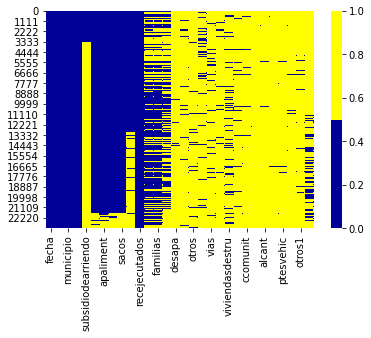

In [43]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [44]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha - 0.0%
departamento - 0.0%
municipio - 0.0%
evento - 0.0%
subsidiodearriendo - 85.0%
menajes - 5.0%
apaliment - 4.0%
materialesconst - 6.0%
sacos - 6.0%
transeconomicas - 40.0%
recejecutados - 1.0%
personas - 35.0%
familias - 36.0%
viviendasaver - 57.0%
desapa - 99.0%
heridos - 94.0%
otros - 93.0%
hectareas - 86.0%
vias - 91.0%
muertos - 94.0%
viviendasdestru - 84.0%
ceducat - 95.0%
ccomunit - 98.0%
ptepeat - 99.0%
alcant - 99.0%
csalud - 99.0%
ptesvehic - 98.0%
acued - 96.0%
otros1 - 96.0%
fechatramiteadtivo - 82.0%


**Filtrar datos solo para cali**

In [47]:
print(len(dataAll))
#filtrar datos solo para cali
dataInundCali=dataAll[dataAll['municipio']=="CALI"]
print(len(dataInundCali))
dataInundCali.head(162)
#print(dataInundCali)

23318
162


,fecha,departamento,municipio,evento,subsidiodearriendo,menajes,apaliment,materialesconst,sacos,transeconomicas,recejecutados,personas,familias,viviendasaver,desapa,heridos,otros,hectareas,vias,muertos,viviendasdestru,ceducat,ccomunit,ptepeat,alcant,csalud,ptesvehic,acued,otros1,fechatramiteadtivo
136,2013-10-05T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO ESTRUCTURAL,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2013-10-03T00:00:00.000,VALLE DEL CAUCA,CALI,DESLIZAMIENTO,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,2013-09-24T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,2013-09-16T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,0,0,0,0,0,0,0,75,15,15,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,2013-08-30T00:00:00.000,VALLE DEL CAUCA,CALI,INCENDIO FORESTAL,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22527,1999-03-17T00:00:00.000,VALLE DEL CAUCA,CALI,DESLIZAMIENTO,NaN,NaN,NaN,NaN,NaN,NaN,0,35,7,NaN,NaN,NaN,NaN,NaN,NaN,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22541,1999-03-12T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,NaN,NaN,1283710,NaN,NaN,NaN,1283710,310,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36250
22550,1999-03-05T00:00:00.000,VALLE DEL CAUCA,CALI,COLAPSO,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22697,1999-02-18T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,NaN,532328.79,476859,NaN,NaN,NaN,1009187.79,535,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36243


[Text(0, 0, 'INCENDIO ESTRUCTURAL'),
 Text(0, 0, 'DESLIZAMIENTO'),
 Text(0, 0, 'INCENDIO FORESTAL'),
 Text(0, 0, 'INUNDACION'),
 Text(0, 0, 'EXPLOSION'),
 Text(0, 0, 'VENDAVAL'),
 Text(0, 0, 'VARIOS'),
 Text(0, 0, 'TORMENTA ELECTRICA'),
 Text(0, 0, 'COLAPSO'),
 Text(0, 0, 'COLAPSO ESTRUCTURAL'),
 Text(0, 0, 'SISMO'),
 Text(0, 0, 'CONTAMINACION')]

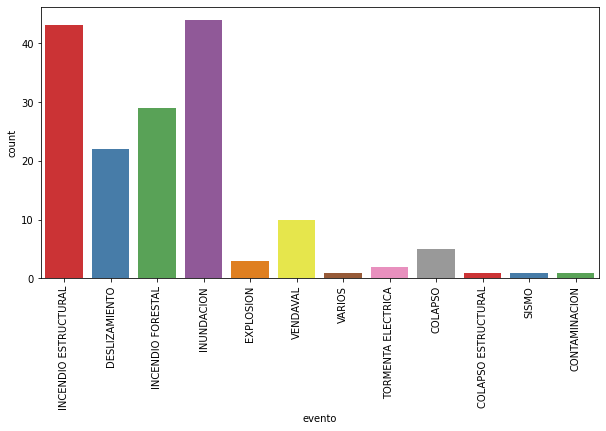

In [60]:
#sns.countplot(dataInundCali["evento"]);

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=dataInundCali,
    x='evento',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [78]:
dataRelacionInundacion=dataInundCali[(dataInundCali["evento"]=='DESLIZAMIENTO') | 
                                     (dataInundCali["evento"]=='INUNDACION') |
                                     (dataInundCali["evento"]=='VENDAVAL') |
                                     (dataInundCali["evento"]=='TORMENTA ELECTRICA')] 
print(len(dataRelacionInundacion))
dataRelacionInundacion.head(50)


78


,fecha,departamento,municipio,evento,subsidiodearriendo,menajes,apaliment,materialesconst,sacos,transeconomicas,recejecutados,personas,familias,viviendasaver,desapa,heridos,otros,hectareas,vias,muertos,viviendasdestru,ceducat,ccomunit,ptepeat,alcant,csalud,ptesvehic,acued,otros1,fechatramiteadtivo
149,2013-10-03T00:00:00.000,VALLE DEL CAUCA,CALI,DESLIZAMIENTO,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,2013-09-16T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,0,0,0,0,0,0,0,75,15,15,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,2013-05-27T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573,2013-05-20T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,18000000,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,2013-04-29T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1842,2013-04-23T00:00:00.000,VALLE DEL CAUCA,CALI,VENDAVAL,0,0,0,0,0,0,0,10,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2184,2013-03-24T00:00:00.000,VALLE DEL CAUCA,CALI,VENDAVAL,0,0,0,0,0,0,0,150,30,30,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2501,2013-02-24T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,0,0,0,0,0,0,0,20,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2502,2013-02-24T00:00:00.000,VALLE DEL CAUCA,CALI,DESLIZAMIENTO,0,0,0,0,0,0,0,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3787,2012-10-23T00:00:00.000,VALLE DEL CAUCA,CALI,INUNDACION,NaN,0,0,0,0,0,17400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17400000,NaN


## Base de datos Humedad del Aire 2 metros


In [80]:


client = Socrata("www.datos.gov.co", None)
results = client.get("uext-mhny", limit=20000)  #51.901.976
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

In [82]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


In [88]:
dataAll.dtypes

codigoestacion       object
codigosensor         object
fechaobservacion     object
valorobservado       object
nombreestacion       object
departamento         object
municipio            object
zonahidrografica     object
latitud              object
longitud             object
descripcionsensor    object
unidadmedida         object
dtype: object

In [89]:
dataAll['fechaobservacion'] = dataAll['fechaobservacion'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))
dataAll.dtypes

codigoestacion                    object
codigosensor                      object
fechaobservacion     datetime64[ns, UTC]
valorobservado                    object
nombreestacion                    object
departamento                      object
municipio                         object
zonahidrografica                  object
latitud                           object
longitud                          object
descripcionsensor                 object
unidadmedida                      object
dtype: object

**Filtrar datos solo para cali**

In [87]:
print(len(dataAll))
#filtrar datos solo para cali
dataInundCali=dataAll[dataAll['municipio']=="CALI"]
print(len(dataInundCali))
dataInundCali.head(500)
#print(dataInundCali)

20000
137


,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
260,0026055120,0027,2010-10-15T05:00:00.000,87,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Humedad del aire 2 mt,%
374,0026055120,0027,2007-04-16T06:00:00.000,94,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Humedad del aire 2 mt,%
406,0026055100,0027,2009-07-21T04:00:00.000,94,FARALLONES - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.416055556,-76.6515,Humedad del aire 2 mt,%
409,0026055100,0027,2016-01-10T05:00:00.000,93,FARALLONES - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.416055556,-76.6515,Humedad del aire 2 mt,%
511,0026085170,0027,2007-02-07T18:00:00.000,53,BASE AEREA MARCO FIDEL SUAREZ - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.4545,-76.49972222,Humedad del aire 2 mt,%
...,...,...,...,...,...,...,...,...,...,...,...,...
19649,0026085160,0027,2017-02-19T09:00:00.000,64,SILOE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.4255,-76.56061111,Humedad del aire 2 mt,%
19654,0026085170,0027,2009-05-28T22:00:00.000,92,BASE AEREA MARCO FIDEL SUAREZ - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.4545,-76.49972222,Humedad del aire 2 mt,%
19717,0026085170,0027,2013-03-26T20:00:00.000,78,BASE AEREA MARCO FIDEL SUAREZ - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.4545,-76.49972222,Humedad del aire 2 mt,%
19800,0026055120,0027,2011-12-25T05:00:00.000,97,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Humedad del aire 2 mt,%


## Base de datos Temperatura Maxima del Aire 2 metros


In [90]:


client = Socrata("www.datos.gov.co", None)
results = client.get("ccvq-rp9s", limit=20000) #18,105,178
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

In [91]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [93]:
print(len(dataAll))
#filtrar datos solo para cali
dataInundCali=dataAll[dataAll['municipio']=="CALI"]
print(len(dataInundCali))
dataInundCali.head(50)

20000
530


,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
137,0026055100,0069,2018-03-20T07:00:00.000,13.8,FARALLONES - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.416055556,-76.6515,Temp Max Aire 2 m,°C
154,0026055100,0069,2014-10-14T22:22:00.000,15.7,FARALLONES - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.416055556,-76.6515,Temp Max Aire 2 m,°C
209,0026055120,0069,2013-04-23T03:47:00.000,20.4,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Temp Max Aire 2 m,°C
254,0026085160,0069,2019-06-06T01:01:00.000,21.4,SILOE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.4255,-76.56061111,Temp Max Aire 2 m,°C
337,0026055100,0069,2017-05-27T01:30:00.000,15,FARALLONES - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.416055556,-76.6515,Temp Max Aire 2 m,°C
340,0026085170,0069,2008-03-20T09:57:00.000,26.5,BASE AEREA MARCO FIDEL SUAREZ - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.4545,-76.49972222,Temp Max Aire 2 m,°C
398,0026055120,0069,2016-08-12T20:08:00.000,26.3,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Temp Max Aire 2 m,°C
406,0026055120,0069,2009-03-03T10:21:00.000,25.7,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Temp Max Aire 2 m,°C
509,0026055100,0069,2014-08-26T17:10:00.000,22.5,FARALLONES - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.416055556,-76.6515,Temp Max Aire 2 m,°C
535,0026055120,0069,2009-10-19T15:39:00.000,28.8,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Temp Max Aire 2 m,°C


## Base de datos Velocidad Viento


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("sgfv-3yp8", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

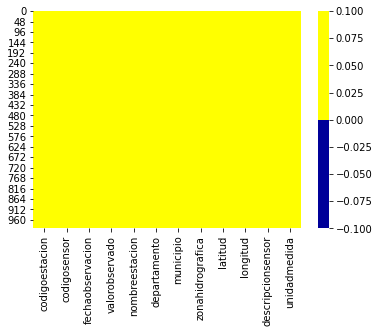

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]


## Base de datos Nivel Maximo del rio


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("vfth-yucv", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

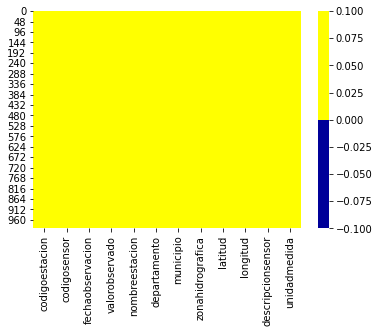

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

codigoestacion - 0.0%
codigosensor - 0.0%
fechaobservacion - 0.0%
valorobservado - 0.0%
nombreestacion - 0.0%
departamento - 0.0%
municipio - 0.0%
zonahidrografica - 0.0%
latitud - 0.0%
longitud - 0.0%
descripcionsensor - 0.0%
unidadmedida - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]


## Base de datos Reporte Calidad Del Agua 2015 - 2018 en la ciudad de Santiago de Cali


In [ ]:


client = Socrata("www.datos.gov.co", None)
results = client.get("x3ds-vaid", limit=1000)
dataAll = pd.DataFrame.from_records(results)

**Observar datos faltantes** 

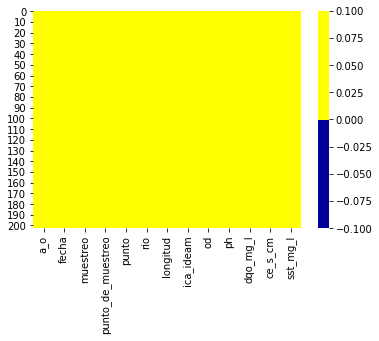

In [ ]:
cols = dataAll.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dataAll[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in dataAll.columns:
    pct_missing = np.mean(dataAll[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

a_o - 0.0%
fecha - 0.0%
muestreo - 0.0%
punto_de_muestreo - 0.0%
punto - 0.0%
rio - 0.0%
longitud - 0.0%
ica_ideam - 0.0%
od - 0.0%
ph - 0.0%
dqo_mg_l - 0.0%
ce_s_cm - 0.0%
sst_mg_l - 0.0%


**Filtrar datos solo para cali**

In [ ]:
print(len(dataInund))
#filtrar datos solo para cali
dataInundCali=dataInundAll[dataInundAll['municipio']=="CALI"]
print(dataInundCali)

14
                        fecha  ... num_missing
63    2013-09-16T00:00:00.000  ...           1
276   2013-05-27T00:00:00.000  ...           4
311   2013-05-20T00:00:00.000  ...           4
383   2013-04-29T00:00:00.000  ...           4
505   2013-02-24T00:00:00.000  ...           1
658   2012-10-23T00:00:00.000  ...           4
1197  2012-05-06T00:00:00.000  ...           1
1238  2012-04-28T00:00:00.000  ...           1
1340  2012-04-22T00:00:00.000  ...           4
1399  2012-04-18T00:00:00.000  ...           4
1601  2012-03-25T00:00:00.000  ...           1
1662  2012-03-10T00:00:00.000  ...           1
1765  2012-01-24T00:00:00.000  ...           1
1962  2011-12-05T00:00:00.000  ...           1

[14 rows x 13 columns]
